# Morphological Operations

Morphology generally concerned with shape and properties of objects. 
Two basic operations are Erosion and Dilation.

Dilation: Adds pixels to the boundaries of objects in an image. (expanding shapes)

Erosion: Removes pixels on object boundaries.

The number of pixels added or removed from the objects in an image depends on the size and shape of the structuring element used to process the image.

A structuring element is a shape mask used in the basic morphological operations. They can be any shape and size that is digitally representable, and each has an origin.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [3]:
def show_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [4]:
img = read_img()

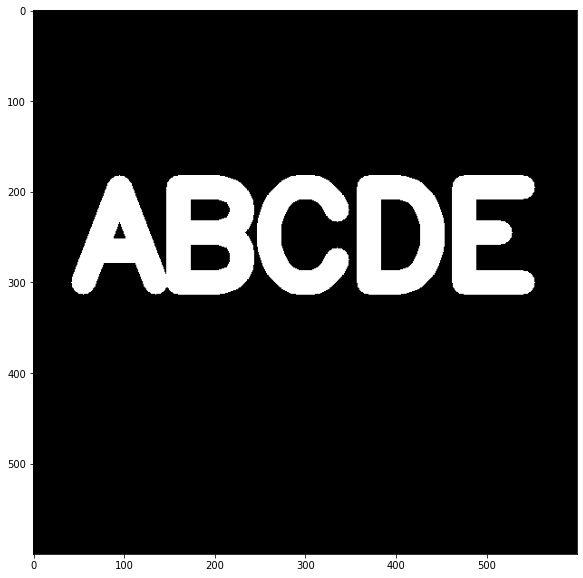

In [5]:
show_img(img)

## Dilation

In [48]:
structElement = np.ones((5,5),np.uint8)
dilation1 = cv2.dilate(img,structElement,iterations = 10)

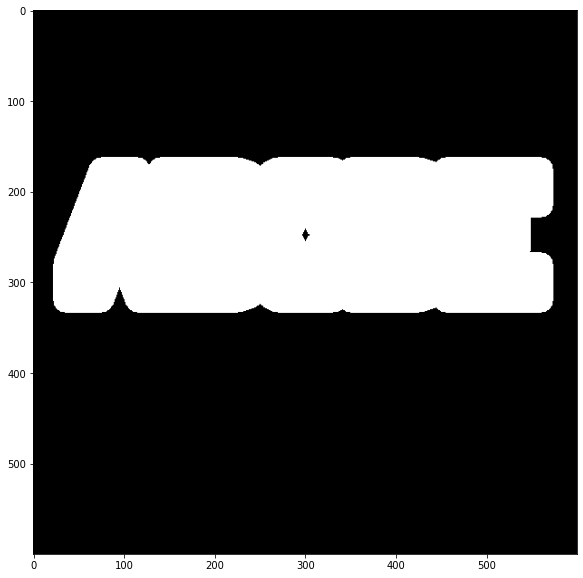

In [49]:
show_img(dilation1)

In [50]:
img = read_img()
structElement = np.ones((5,5),np.uint8)
dilation4 = cv2.dilate(img,structElement,iterations = 4)

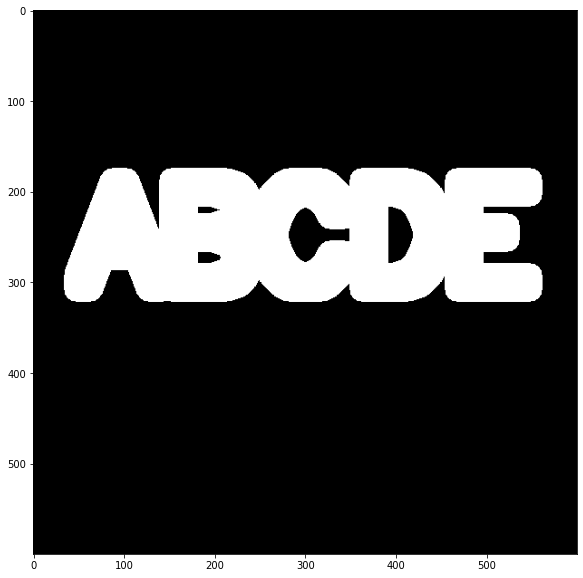

In [51]:
show_img(dilation4)

## Erosion

Erodes away boundaries of foreground objects. Works best when foreground is light color (preferrably white) and background is dark.

In [52]:
structElement = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(img,structElement,iterations = 1)

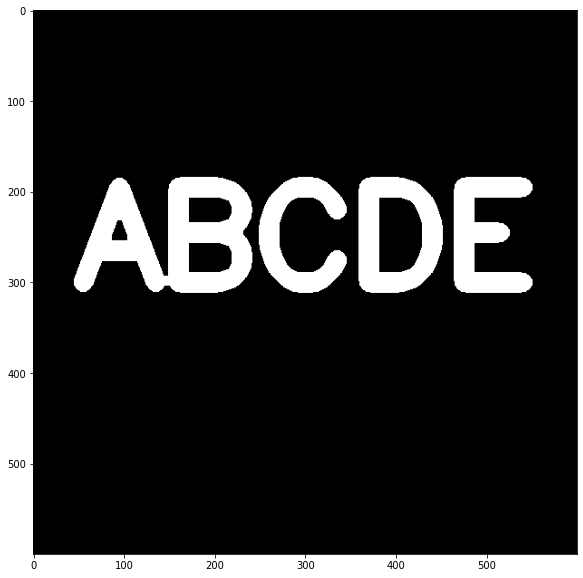

In [53]:
show_img(erosion1)

In [54]:
img = read_img()
structElement = np.ones((5,5),np.uint8)
erosion4 = cv2.erode(img,structElement,iterations = 4)

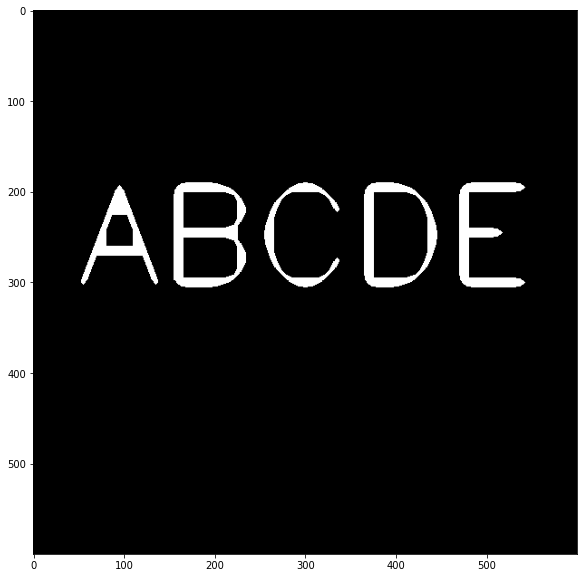

In [55]:
show_img(erosion4)

## Opening
Opening is erosion followed by dilation. Useful in removing background noise!

In [56]:
img = read_img()

In [57]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

In [58]:
white_noise

array([[1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 0, 0]])

In [59]:
white_noise = white_noise*255

In [60]:
white_noise

array([[255, 255,   0, ..., 255,   0,   0],
       [255,   0,   0, ...,   0, 255,   0],
       [  0,   0, 255, ...,   0,   0,   0],
       ...,
       [255,   0, 255, ..., 255, 255, 255],
       [255, 255,   0, ...,   0, 255, 255],
       [  0,   0, 255, ..., 255,   0,   0]])

In [61]:
white_noise.shape

(600, 600)

In [62]:
img.shape

(600, 600)

In [63]:
noise_img = white_noise+img

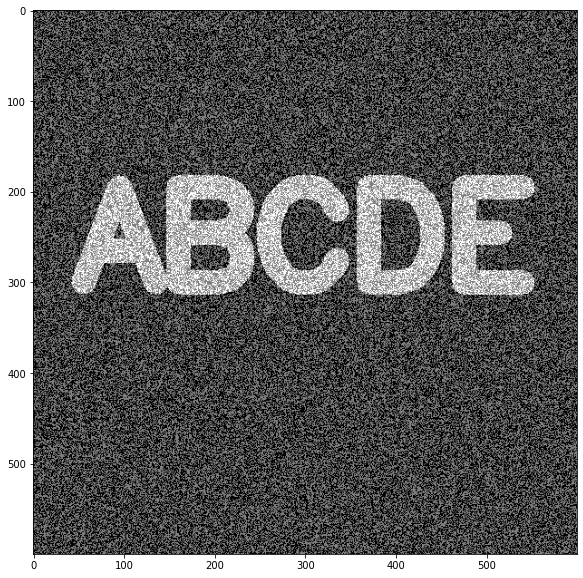

In [64]:
show_img(noise_img)

In [65]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, structElement)

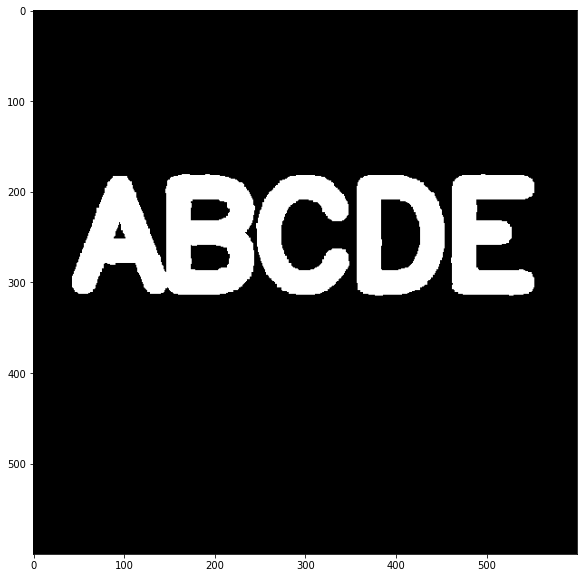

In [66]:
show_img(opening)

### Closing
 Useful in removing noise from foreground objects, such as black dots on top of the white text.

In [67]:
img = read_img()

In [68]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [69]:
black_noise

array([[0, 1, 0, ..., 1, 1, 0],
       [0, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 1]])

In [70]:
black_noise= black_noise * -255

In [71]:
black_noise_img = img + black_noise

In [72]:
black_noise_img

array([[   0., -255.,    0., ..., -255., -255.,    0.],
       [   0., -255., -255., ...,    0.,    0., -255.],
       [-255., -255., -255., ..., -255., -255., -255.],
       ...,
       [   0., -255., -255., ...,    0., -255.,    0.],
       [-255.,    0.,    0., ...,    0., -255., -255.],
       [   0.,    0.,    0., ..., -255.,    0., -255.]])

In [73]:
black_noise_img[black_noise_img==-255] = 0

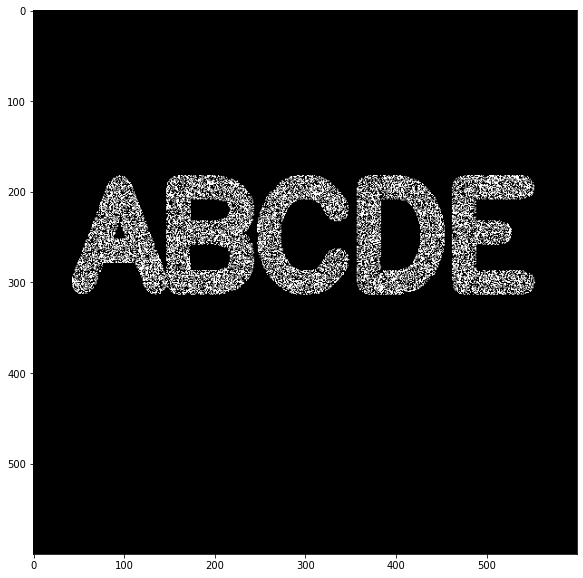

In [74]:
show_img(black_noise_img)

In [75]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, structElement)

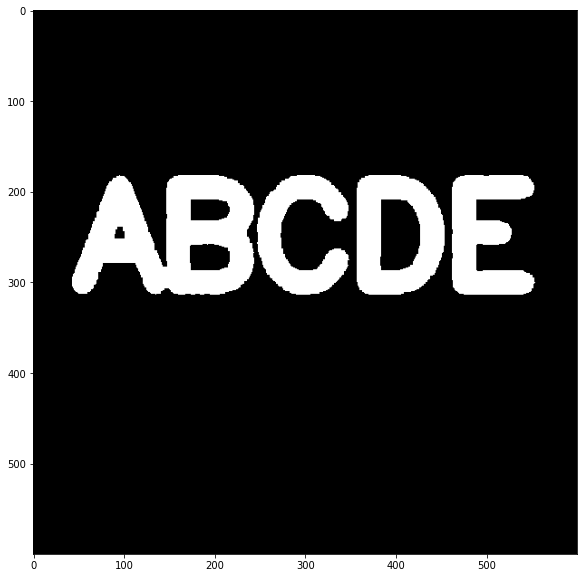

In [76]:
show_img(closing)

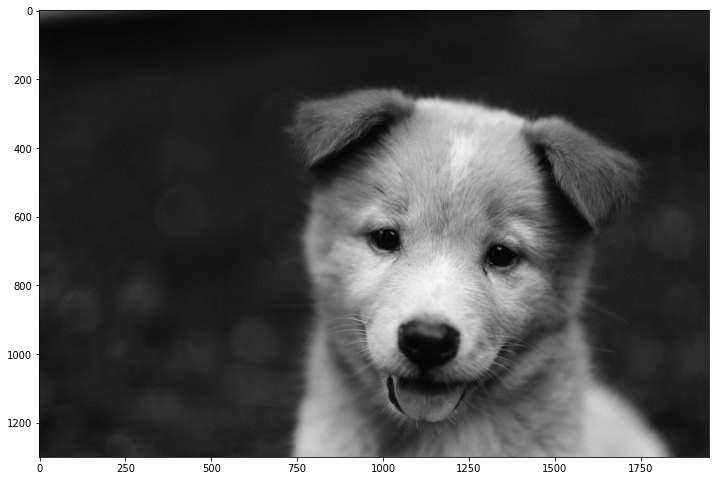

In [77]:
binImage = cv2.imread("/content/puppy.jpg",0)
show_img(binImage)

In [78]:
structElement = np.ones((5,5), np.uint8)

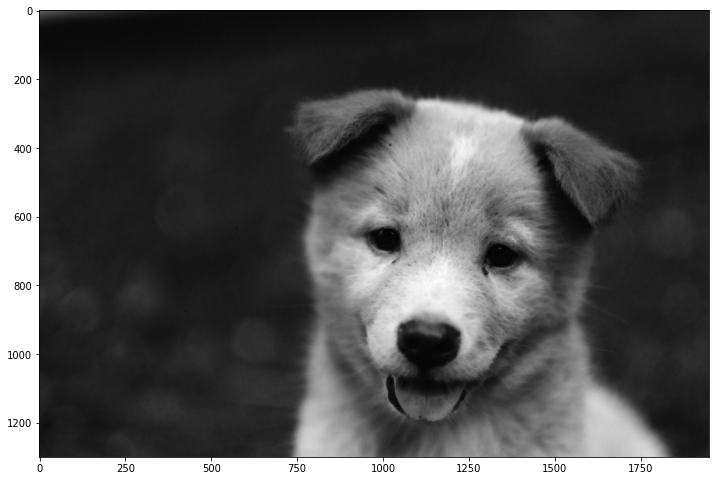

In [79]:
erosionlady = cv2.erode(binImage.copy(), structElement, iterations = 1)
show_img(erosionlady)

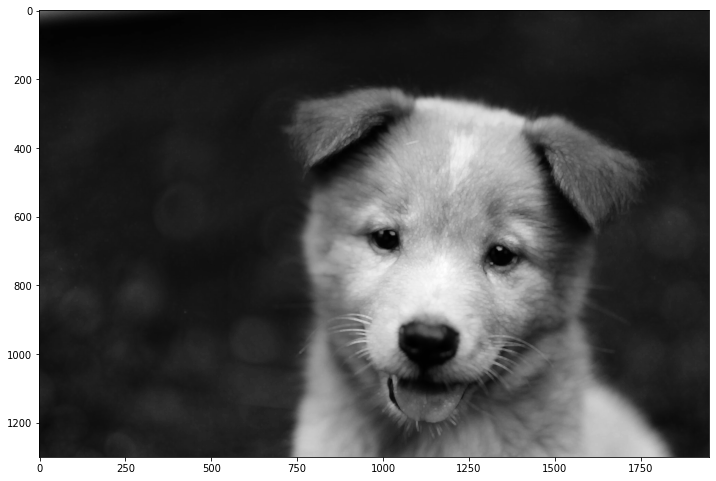

In [80]:
dilationlady = cv2.dilate(binImage.copy(), structElement, iterations = 1)
show_img(dilationlady)

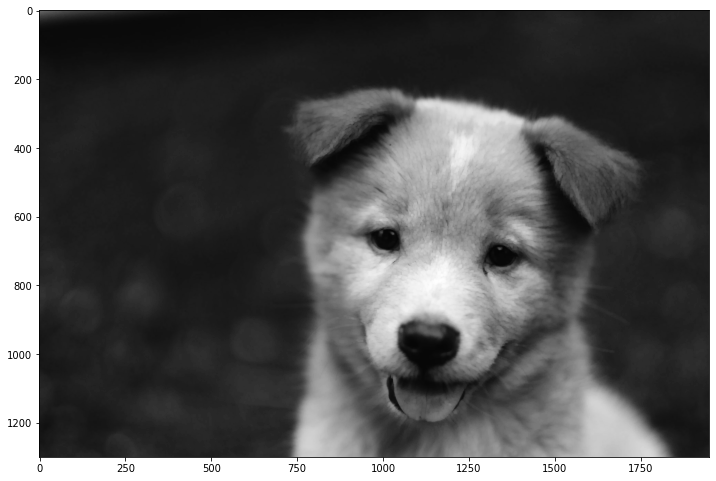

In [81]:
# opening - erosion + dilation (in that order)
openingmorph = cv2.morphologyEx(binImage.copy(), cv2.MORPH_OPEN,
                           structElement, iterations=1)

show_img(openingmorph)

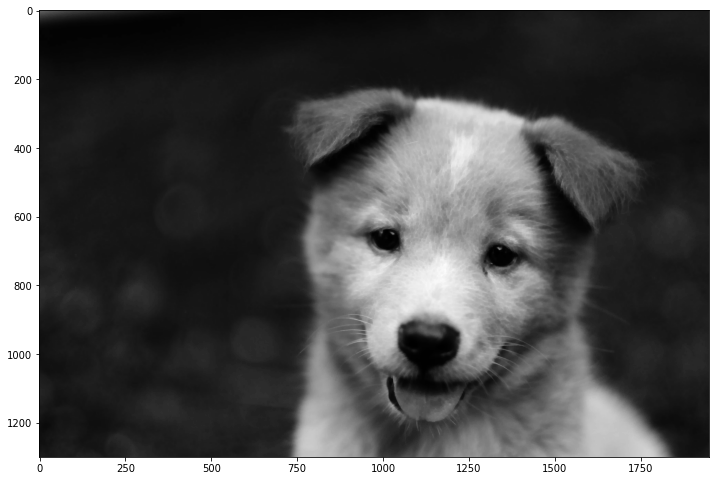

In [82]:
#closing - dilation+erosion
closing = cv2.morphologyEx(binImage.copy(), cv2.MORPH_CLOSE,
                           structElement, iterations=1)

show_img(closing)

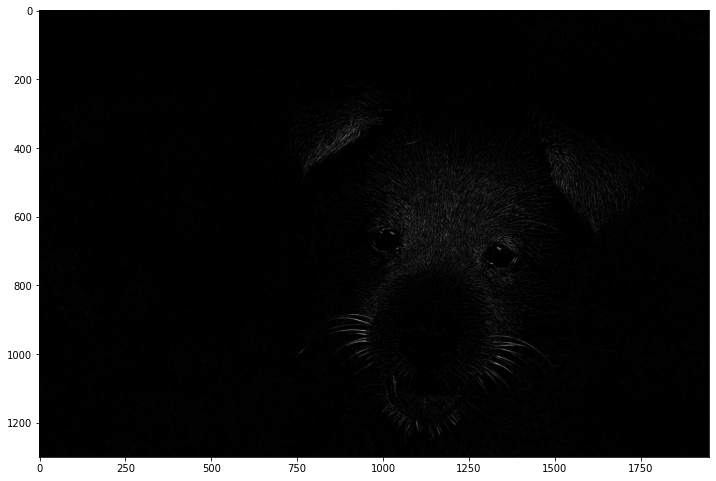

In [83]:
tophatmorph = cv2.morphologyEx(binImage, cv2.MORPH_TOPHAT,
                           structElement, iterations=1)
show_img(tophatmorph)

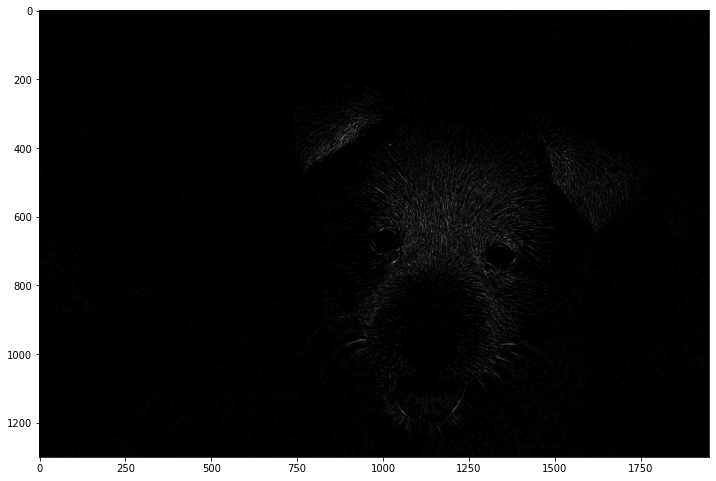

In [84]:
blackhatmorph = cv2.morphologyEx(binImage, cv2.MORPH_BLACKHAT,
                           structElement, iterations=1)

show_img(blackhatmorph)